# Powerlifting competition data analysis.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Initial data exploration.

In [4]:
#load datasets.
meets_df = pd.read_csv('meets.csv')
lifters_df = pd.read_csv('openpowerlifting.csv')

#show first rows.
print("Competition data sample:")
print(meets_df.head())
print("\nLifters data sample:")
print(lifters_df.head())

#dataset info.
print("\nCompetition dataset info:")
print(meets_df.info())
print("\nLifters dataset info:")
print(lifters_df.info())

#basic stats.
print("\nCompetition basic stats:")
print(meets_df.describe())
print("\nLifters basic stats:")
print(lifters_df.describe())

Competition data sample:
   MeetID        MeetPath Federation        Date MeetCountry MeetState  \
0       0  365strong/1601  365Strong  2016-10-29         USA        NC   
1       1  365strong/1602  365Strong  2016-11-19         USA        MO   
2       2  365strong/1603  365Strong  2016-07-09         USA        NC   
3       3  365strong/1604  365Strong  2016-06-11         USA        SC   
4       4  365strong/1605  365Strong  2016-04-10         USA        SC   

    MeetTown                                           MeetName  
0  Charlotte  2016 Junior & Senior National Powerlifting Cha...  
1      Ozark                  Thanksgiving Powerlifting Classic  
2  Charlotte                             Charlotte Europa Games  
3  Rock Hill                   Carolina Cup Push Pull Challenge  
4  Rock Hill                              Eastern USA Challenge  

Lifters data sample:
   MeetID              Name Sex   Equipment   Age     Division  BodyweightKg  \
0       0  Angie Belk Terry   F 

## Missing values analysis.

Competition missing data:
MeetID            0
MeetPath          0
Federation        0
Date              0
MeetCountry       0
MeetState      2986
MeetTown       1509
MeetName          0
dtype: int64

Lifters missing data:
MeetID                 0
Name                   0
Sex                    0
Equipment              0
Age               239267
Division           15843
BodyweightKg        2402
WeightClassKg       3812
Squat4Kg          385171
BestSquatKg        88343
Bench4Kg          384452
BestBenchKg        30050
Deadlift4Kg       383614
BestDeadliftKg     68567
TotalKg            23177
Place               1092
Wilks              24220
dtype: int64


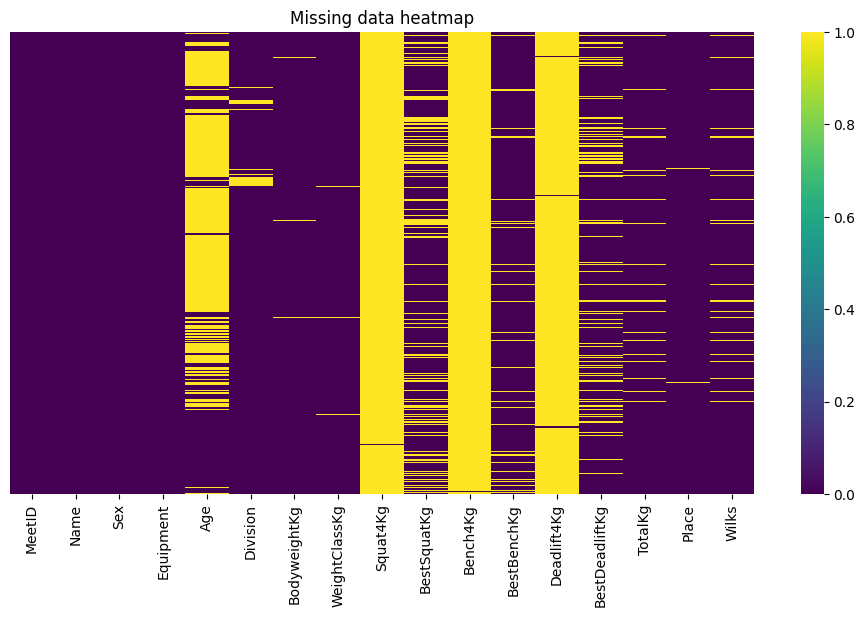

In [5]:
#verify missing data
print("Competition missing data:")
print(meets_df.isnull().sum())
print("\nLifters missing data:")
print(lifters_df.isnull().sum())

#visualize missing data %.
plt.figure(figsize=(12, 6))
sns.heatmap(lifters_df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title('Missing data heatmap')
plt.show()

## Dataset relationship analysis

In [6]:
#verify dataset relationship using MeetID.
print("\nUnique number of MeetID in competitions:", meets_df['MeetID'].nunique())
print("Unique number of MeetID in lifters:", lifters_df['MeetID'].nunique())

#verify MeetIDs intersection.
meet_ids_comp = set(meets_df['MeetID'])
meet_ids_lift = set(lifters_df['MeetID'])
intersection = meet_ids_comp.intersection(meet_ids_lift)

print(f"\nNumber of competitions showing in both datasets: {len(intersection)}")


Unique number of MeetID in competitions: 8482
Unique number of MeetID in lifters: 8482

Number of competitions showing in both datasets: 8482


## Initial data cleaning

In [7]:
#convert dates into datetime format.
meets_df['Date'] = pd.to_datetime(meets_df['Date'])

#delete duplicates.
meets_df = meets_df.drop_duplicates()
lifters_df = lifters_df.drop_duplicates()

#verify numeric range values.
print("\nRange of values in numeric columns:")
numeric_cols = lifters_df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    print(f"{col}:")
    print(f"Min: {lifters_df[col].min()}")
    print(f"Max: {lifters_df[col].max()}")
    print("---")


Range of values in numeric columns:
MeetID:
Min: 0
Max: 8481
---
Age:
Min: 5.0
Max: 95.0
---
BodyweightKg:
Min: 15.88
Max: 242.4
---
Squat4Kg:
Min: -440.5
Max: 450.0
---
BestSquatKg:
Min: -477.5
Max: 573.79
---
Bench4Kg:
Min: -360.0
Max: 378.75
---
BestBenchKg:
Min: -522.5
Max: 488.5
---
Deadlift4Kg:
Min: -461.0
Max: 418.0
---
BestDeadliftKg:
Min: -410.0
Max: 460.4
---
TotalKg:
Min: 11.0
Max: 1365.31
---
Wilks:
Min: 13.73
Max: 779.38
---


## Powerlifting meetings analysis

In [ ]:
import plotly.express as px
import folium
from folium.plugins import HeatMap

Competitions general statistics:
Total de competiciones: 8482
Rango de fechas: 1974-03-02 00:00:00 a 2018-01-28 00:00:00
Número de países: 45
Número de federaciones: 60


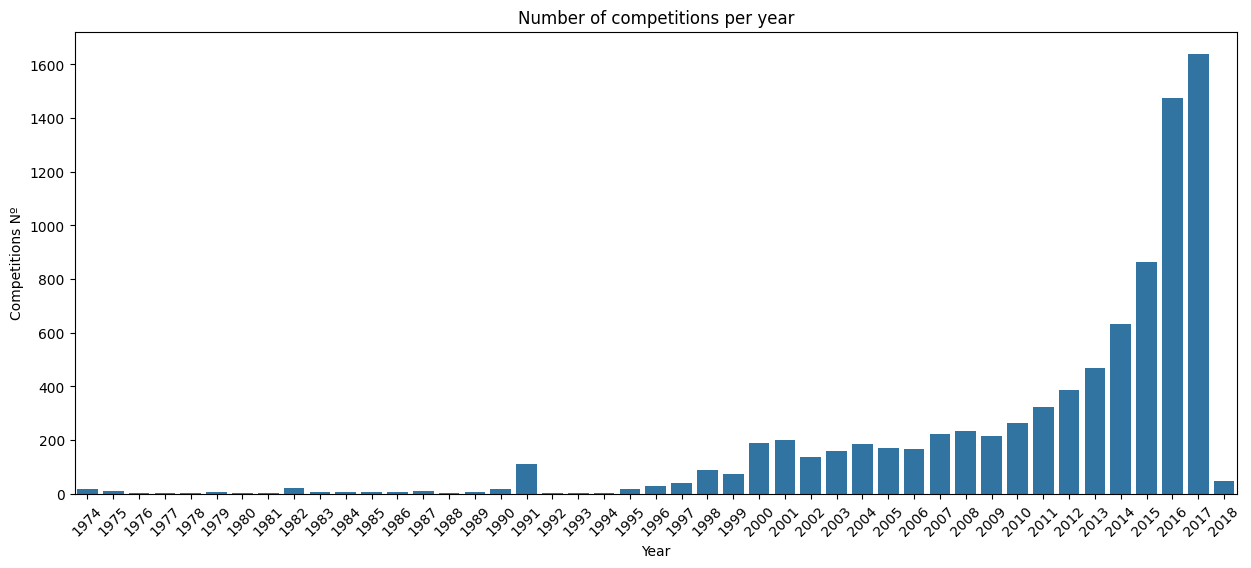


Top 5 cities with more competitions:
MeetTown
Brumunddal    163
Bergen        124
Halden        101
Melbourne      96
Oslo           93
Name: count, dtype: int64


C:\Users\glamb\AppData\Local\Temp\ipykernel_31360\4041610542.py:36: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1500x800 with 0 Axes>

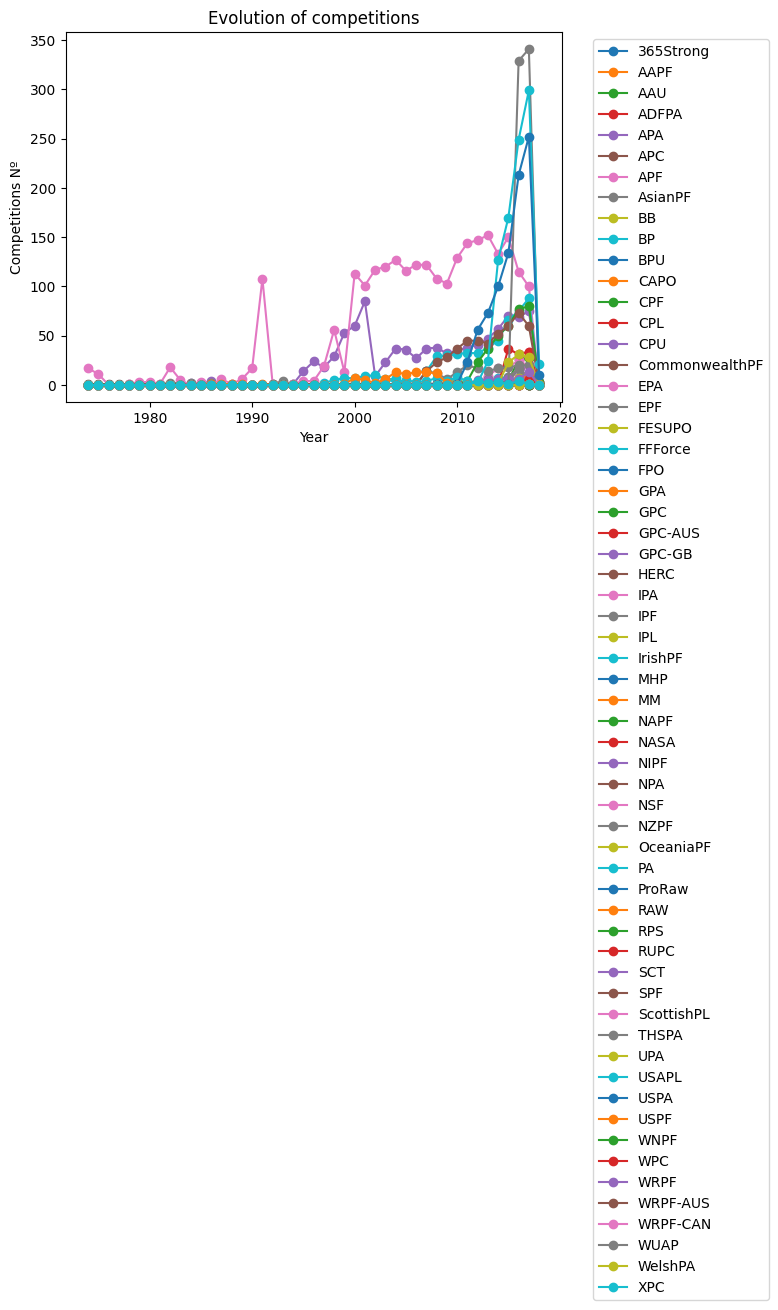

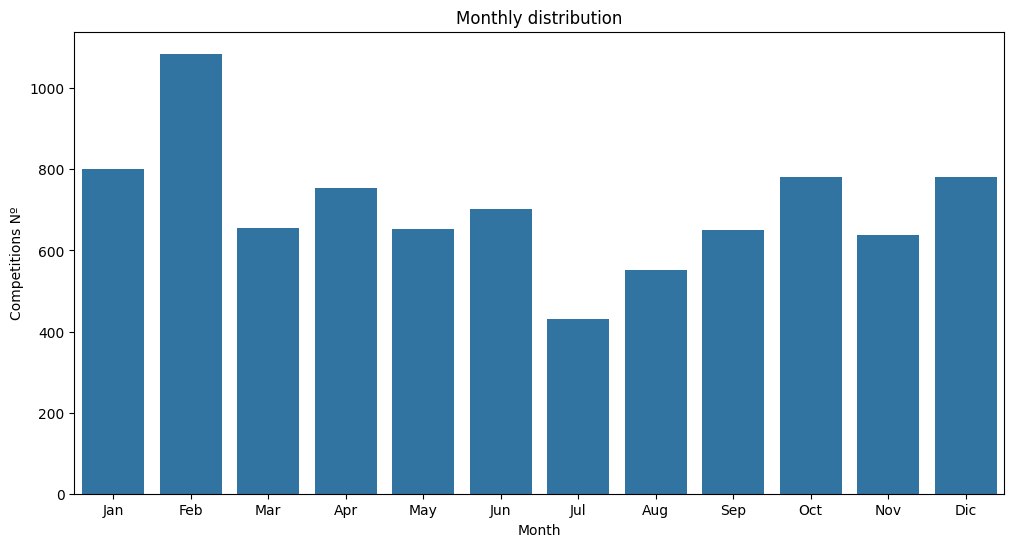

In [ ]:
#competition statistics general analysis.
print("Competitions general statistics:")
print(f"Total de competiciones: {meets_df['MeetID'].nunique()}")
print(f"Rango de fechas: {meets_df['Date'].min()} a {meets_df['Date'].max()}")
print(f"Número de países: {meets_df['MeetCountry'].nunique()}")
print(f"Número de federaciones: {meets_df['Federation'].nunique()}")

#event time distribution.
plt.figure(figsize=(15, 6))
meets_df['Year'] = meets_df['Date'].dt.year
yearly_meets = meets_df['Year'].value_counts().sort_index()
sns.barplot(x=yearly_meets.index, y=yearly_meets.values)
plt.title('Number of competitions per year')
plt.xlabel('Year')
plt.ylabel('Competitions Nº')
plt.xticks(rotation=45)
plt.show()

#top 5 locations.
print("\nTop 5 cities with more competitions:")
print(meets_df['MeetTown'].value_counts().head(5))

#federations analysis.
plt.figure(figsize=(15, 8))
federation_yearly = meets_df.pivot_table(
    index='Year',
    columns='Federation',
    aggfunc='size',
    fill_value=0
)
federation_yearly.plot(kind='line', marker='o')
plt.title('Evolution of competitions')
plt.xlabel('Year')
plt.ylabel('Competitions Nº')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#seasonal analysis.
meets_df['Month'] = meets_df['Date'].dt.month
plt.figure(figsize=(12, 6))
monthly_meets = meets_df['Month'].value_counts().sort_index()
sns.barplot(x=monthly_meets.index, y=monthly_meets.values)
plt.title('Monthly distribution')
plt.xlabel('Month')
plt.ylabel('Competitions Nº')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.show()

## Competitors and Scoring analysis.

In [ ]:
#lift analysis by category.
plt.figure(figsize=(15,10))

#add subplot for each lift type.
plt.sublot(3,1,1)
sns.boxplot(x= 'WeightClassKg', y= 'BestSquatKg', data=lifters_df)
plt.title('Squat distribution by weight class')
plt.xticks(rotation=45)

plt.subplot(3, 1, 2)
sns.boxplot(x='WeightClassKg', y='BestBenchKg', data=lifters_df)
plt.title('Distribución de Bench Press por Categoría de Peso')
plt.xticks(rotation=45)

plt.subplot(3, 1, 3)
sns.boxplot(x='WeightClassKg', y='BestDeadliftKg', data=lifters_df)
plt.title('Distribución de Deadlift por Categoría de Peso')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#analysis by gender category.
plt.figure(figsize=(15, 5))

#totalkg histogram by gender.
plt.subplot(1, 2, 1)
sns.histplot(data = lifters_df, x='TotalKg', hue = 'Sex', multiple='stack')
plt.title('TotalKg by gender')

#totalKg vs weight class.
plt.subplot(1, 2, 2)
sns.scatterplot(data=lifters_df, x='BodyweightKg', y='TotalKg', hue='Sex', alpha=0.5)
plt.title('TotalKg vs BodyweightKg')

plt.tight_layout()
plt.show()

#top performers analysis.
def get_top_performers(df, lift_type, n=10):
    return df.nlargest(n, lift_type)[['Name', 'Sex', 'WeightClassKg', lift_type, 'Wilks']]

#top performers in each discipline.
print("\nTop 10 Squats:")
print(get_top_performers(lifters_df, 'BestSquatKg'))

print("\nTop 10 Bench Press:")
print(get_top_performers(lifters_df, 'BestBenchKg'))

print("\nTop 10 Deadlifts:")
print(get_top_performers(lifters_df, 'BestDeadliftKg'))

#age analysis.
plt.figure(figsize=(12, 6))
sns.boxplot(data=lifters_df, x='Division', y='TotalKg')
plt.xticks(rotation=45)
plt.title('Score vs Age')
plt.show()

#correlation between numeric variables.
numeric_cols = ['Age', 'BodyweightKg', 'BestSquatKg', 'BestBenchKg', 'BestDeadliftKg', 'TotalKg', 'Wilks']
correlation_matrix = lifters_df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between score values.')
plt.show()

#relative performance analysis.
plt.figure(figsize=(12, 6))
sns.boxplot(data=lifters_df, x='WeightClassKg', y='Wilks', hue='Sex')
plt.xticks(rotation=45)
plt.title('Wilks Score by weightclass and gender')
plt.show()

#descriptive statistics by gender.
print("\nPerformance statistics by gender:")
print(lifters_df.groupby('Sex')[['BestSquatKg', 'BestBenchKg', 'BestDeadliftKg', 'TotalKg', 'Wilks']].describe())